In [811]:
library(tidyverse)
library(dplyr)
library(MASS)
library(car)
library(stats)
library(ggplot2)
library(boot)


Attaching package: ‘boot’


The following object is masked from ‘package:car’:

    logit




In [813]:
load("./ICPSR_38779/DS0001/38779-0001-Data.rda")

load("./ICPSR_38740/DS0001/38740-0001-Data.rda")

load("./ICPSR_38743/DS0001/38743-0001-Data.rda")

names(da38779.0001)

[1] "ASR_ID"   "CONTENTS" "STATE"    "ORI"      "GROUP"    "DIV"     
 [7] "AGHEADER" "YEAR"     "MSA"      "COUNTY"   "SEQNO"    "SUB"     
[13] "CORE"     "COVBY"    "POP"      "AGENCY"   "STNAME"   "MONTH"   
[19] "MOHEADER" "BREAK"    "AREO"     "ZERO"     "DTLASTUP" "DTPRUP1" 
[25] "DTPRUP2"  "JUVDISP"  "JDHANDDP" "JDREFJC"  "JDREFWA"  "JDREFOPA"
[31] "JDREFCC"  "OFFENSE"  "OCCUR"    "M0_9"     "M10_12"   "M13_14"  
[37] "M15"      "M16"      "M17"      "M18"      "M19"      "M20"     
[43] "M21"      "M22"      "M23"      "M24"      "M25_29"   "M30_34"  
[49] "M35_39"   "M40_44"   "M45_49"   "M50_54"   "M55_59"   "M60_64"  
[55] "M65"      "F0_9"     "F10_12"   "F13_14"   "F15"      "F16"     
[61] "F17"      "F18"      "F19"      "F20"      "F21"      "F22"     
[67] "F23"      "F24"      "F25_29"   "F30_34"   "F35_39"   "F40_44"  
[73] "F45_49"   "F50_54"   "F55_59"   "F60_64"   "F65"      "AW"      
[79] "AB"       "AI"       "AA"       "JW"       "JB"       "JI"      
[85] "JA"       "AH"       "AN"       "JH"       "JN"

In [814]:
head(da38779.0001)

,ASR_ID,CONTENTS,STATE,ORI,GROUP,DIV,AGHEADER,YEAR,MSA,COUNTY,⋯,AI,AA,JW,JB,JI,JA,AH,AN,JH,JN
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,(3) ASR Master File,(3) Detail record,(50) Alaska,AK00101,1C,(9) Pacific,(0) Agency header present,2019,38,0,⋯,0,0,0,0,0,0,NA,NA,NA,NA
2,(3) ASR Master File,(3) Detail record,(50) Alaska,AK00101,1C,(9) Pacific,(0) Agency header present,2019,38,0,⋯,0,1,0,0,0,0,NA,NA,NA,NA
3,(3) ASR Master File,(3) Detail record,(50) Alaska,AK00101,1C,(9) Pacific,(0) Agency header present,2019,38,0,⋯,1,0,0,0,0,0,NA,NA,NA,NA
4,(3) ASR Master File,(3) Detail record,(50) Alaska,AK00101,1C,(9) Pacific,(0) Agency header present,2019,38,0,⋯,6,2,0,0,0,0,NA,NA,NA,NA
5,(3) ASR Master File,(3) Detail record,(50) Alaska,AK00101,1C,(9) Pacific,(0) Agency header present,2019,38,0,⋯,36,4,1,0,5,0,NA,NA,NA,NA
6,(3) ASR Master File,(3) Detail record,(50) Alaska,AK00101,1C,(9) Pacific,(0) Agency header present,2019,38,0,⋯,5,1,0,0,2,0,NA,NA,NA,NA


In [815]:
print(da38779.0001[5,])

               ASR_ID          CONTENTS       STATE       ORI GROUP         DIV
5 (3) ASR Master File (3) Detail record (50) Alaska AK00101      1C (9) Pacific
                   AGHEADER YEAR MSA COUNTY SEQNO              SUB CORE COVBY
5 (0) Agency header present 2019  38      0     0 (0) Non-Suburban    Y    NA
     POP                   AGENCY STNAME MONTH                 MOHEADER BREAK
5 287731 ANCHORAGE                ALASKA     1 (0) Month header present     G
  AREO         ZERO DTLASTUP DTPRUP1 DTPRUP2 JUVDISP JDHANDDP JDREFJC JDREFWA
5    1 (0) Not used    70618   70218   62918       0        0       0       0
  JDREFOPA JDREFCC OFFENSE OCCUR M0_9 M10_12 M13_14 M15 M16 M17 M18 M19 M20 M21
5        0       0     04     58    0      1      1   2   1   0   2   1   0   2
  M22 M23 M24 M25_29 M30_34 M35_39 M40_44 M45_49 M50_54 M55_59 M60_64 M65 F0_9
5   3   2   1     13     10      9      7      2      4      4      0   0    0
  F10_12 F13_14 F15 F16 F17 F18 F19 F20 F21 F22 F23 F2

In [816]:
da1 = da38779.0001[,c(3, 8, 12, 13, 18, 32, 34:77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89)]
da2 = da38740.0001[,c(3, 8, 12, 13, 18, 32, 34:77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89)]
da3 = da38743.0001[,c(3, 8, 12, 13, 18, 32, 34:77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89)]

In [817]:
summary(da1)

               STATE             YEAR                    SUB        
 (04) California  :117232   Min.   :2019   (0) Non-Suburban:647266  
 (42) Texas       : 98576   1st Qu.:2019   (1) Suburban    :708759  
 (37) Pennsylvania: 85692   Median :2019                            
 (29) New Jersey  : 60935   Mean   :2019                            
 (31) New York    : 48869   3rd Qu.:2019                            
 (21) Michigan    : 47643   Max.   :2019                            
 (Other)          :897078                                           
 CORE            MONTH           OFFENSE            M0_9       
 N:1205685   Min.   : 1.000   26     :110445   Min.   : 0      
 Y: 150340   1st Qu.: 3.000   18     : 97363   1st Qu.: 0      
             Median : 6.000   21     : 92035   Median : 0      
             Mean   : 6.309   185    : 91698   Mean   : 0      
             3rd Qu.: 9.000   08     : 88036   3rd Qu.: 0      
             Max.   :12.000   (Other):871739   Max.   :10      


In [818]:
subset_da1 <- subset(da1, OFFENSE == '04 ')
subset_da2 <- subset(da2, OFFENSE == '04 ')
subset_da3 <- subset(da3, OFFENSE == '04 ')


In [819]:
dim(subset_da1)

[1] 54496    62

In [820]:
dim(subset_da2)

[1] 62064    62

In [821]:
dim(subset_da3)

[1] 57775    62

In [918]:
combined_df <- bind_rows(subset_da1, subset_da2, subset_da3)
dim(combined_df)

[1] 174335     62

In [919]:
head(combined_df, 10)

,STATE,YEAR,SUB,CORE,MONTH,OFFENSE,M0_9,M10_12,M13_14,M15,⋯,AI,AA,JW,JB,JI,JA,AH,AN,JH,JN
,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,(50) Alaska,2019,(0) Non-Suburban,Y,1,04,0,1,1,2,⋯,36,4,1,0,5,0,NA,NA,NA,NA
2,(50) Alaska,2019,(0) Non-Suburban,Y,2,04,1,1,1,0,⋯,28,3,3,1,1,0,NA,NA,NA,NA
3,(50) Alaska,2019,(0) Non-Suburban,Y,3,04,0,1,1,2,⋯,35,8,4,1,1,0,NA,NA,NA,NA
4,(50) Alaska,2019,(0) Non-Suburban,Y,4,04,0,0,1,3,⋯,39,5,7,1,1,2,NA,NA,NA,NA
5,(50) Alaska,2019,(0) Non-Suburban,Y,5,04,0,1,2,1,⋯,45,9,4,0,2,0,NA,NA,NA,NA
6,(50) Alaska,2019,(0) Non-Suburban,Y,6,04,0,0,1,0,⋯,42,13,2,0,2,0,NA,NA,NA,NA
7,(50) Alaska,2019,(0) Non-Suburban,Y,7,04,0,1,0,0,⋯,33,8,0,0,2,3,NA,NA,NA,NA
8,(50) Alaska,2019,(0) Non-Suburban,Y,8,04,0,0,2,0,⋯,31,6,0,3,3,0,NA,NA,NA,NA
9,(50) Alaska,2019,(0) Non-Suburban,Y,9,04,0,0,0,0,⋯,36,12,1,0,1,0,NA,NA,NA,NA


In [920]:
columns_to_replace_na <- c(7:62)

combined_df[, columns_to_replace_na] <- lapply(combined_df[, columns_to_replace_na], function(x) replace(x, is.na(x), 0))
                                               
                                               

In [921]:
summary(combined_df)

               STATE             YEAR                    SUB        CORE      
 (04) California  : 18000   Min.   :2017   (0) Non-Suburban:84991   N:155452  
 (42) Texas       : 16672   1st Qu.:2017   (1) Suburban    :89344   Y: 18883  
 (37) Pennsylvania: 10705   Median :2018                                      
 (21) Michigan    :  7206   Mean   :2018                                      
 (41) Tennessee   :  6517   3rd Qu.:2019                                      
 (29) New Jersey  :  6233   Max.   :2019                                      
 (Other)          :109002                                                     
     MONTH           OFFENSE            M0_9              M10_12        
 Min.   : 1.000   04     :174335   Min.   :0.000000   Min.   : 0.00000  
 1st Qu.: 4.000   00     :     0   1st Qu.:0.000000   1st Qu.: 0.00000  
 Median : 6.000   01A    :     0   Median :0.000000   Median : 0.00000  
 Mean   : 6.455   01B    :     0   Mean   :0.002604   Mean   : 0.02741  
 3r

In [922]:
total_na_count <- sum(is.na(combined_df))
total_na_count

[1] 0

In [923]:
weights <- c(4.5, 11, 13.5, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 27, 32, 37, 42, 47, 52, 57, 62, 65, 
             4.5, 11, 13.5, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 27, 32, 37, 42, 47, 52, 57, 62, 65)

weights1 <- c(4.5, 11, 13.5, 15, 16, 17, 18, 4.5, 11, 13.5, 15, 16, 17, 18)

weights2 <- c(19, 20, 21, 22, 23, 24, 27, 32, 37, 42, 47, 52, 57, 62, 65,
             19, 20, 21, 22, 23, 24, 27, 32, 37, 42, 47, 52, 57, 62, 65)


columns_to_sum <- c(7:50)
combined_df$Age_total <- rowSums(combined_df[, columns_to_sum] * weights[1:length(weights)])

juve_cols <- c(7:13, 29:35)
combined_df$Age_juve <- rowSums(combined_df[, juve_cols] * weights1[1:length(weights1)])

adult_cols <- c(14:28, 36:50)
combined_df$Age_adult <- rowSums(combined_df[, adult_cols] * weights2[1:length(weights2)])

In [924]:
head(combined_df)

,STATE,YEAR,SUB,CORE,MONTH,OFFENSE,M0_9,M10_12,M13_14,M15,⋯,JB,JI,JA,AH,AN,JH,JN,Age_total,Age_juve,Age_adult
,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,(50) Alaska,2019,(0) Non-Suburban,Y,1,04,0,1,1,2,⋯,0,5,0,0,0,0,0,2291.0,36,2166
2,(50) Alaska,2019,(0) Non-Suburban,Y,2,04,1,1,1,0,⋯,1,1,0,0,0,0,0,2429.5,55,2530
3,(50) Alaska,2019,(0) Non-Suburban,Y,3,04,0,1,1,2,⋯,1,1,0,0,0,0,0,2904.0,81,3175
4,(50) Alaska,2019,(0) Non-Suburban,Y,4,04,0,0,1,3,⋯,1,1,2,0,0,0,0,3287.0,195,3549
5,(50) Alaska,2019,(0) Non-Suburban,Y,5,04,0,1,2,1,⋯,0,2,0,0,0,0,0,2951.5,128,3370
6,(50) Alaska,2019,(0) Non-Suburban,Y,6,04,0,0,1,0,⋯,0,2,0,0,0,0,0,2442.5,102,2853


In [925]:
combined_df$Total <- rowSums(combined_df[, 51:62], na.rm = TRUE)
combined_df$juve <- rowSums(combined_df[, juve_cols], na.rm = TRUE)
combined_df$adult <- rowSums(combined_df[, adult_cols], na.rm = TRUE)



combined_df <- combined_df[combined_df$Total != 0, ]

In [926]:
dim(combined_df)

[1] 165681     68

In [927]:
print(combined_df[1:3,])

        STATE YEAR              SUB CORE MONTH OFFENSE M0_9 M10_12 M13_14 M15
1 (50) Alaska 2019 (0) Non-Suburban    Y     1     04     0      1      1   2
2 (50) Alaska 2019 (0) Non-Suburban    Y     2     04     1      1      1   0
3 (50) Alaska 2019 (0) Non-Suburban    Y     3     04     0      1      1   2
  M16 M17 M18 M19 M20 M21 M22 M23 M24 M25_29 M30_34 M35_39 M40_44 M45_49 M50_54
1   1   0   2   1   0   2   3   2   1     13     10      9      7      2      4
2   0   1   0   0   2   1   3   1   4     11      6     10     12      6      1
3   1   0   0   3   2   2   2   2   1     16      6     11      7      7      3
  M55_59 M60_64 M65 F0_9 F10_12 F13_14 F15 F16 F17 F18 F19 F20 F21 F22 F23 F24
1      4      0   0    0      0      1   0   0   0   0   0   1   0   3   1   0
2      2      1   1    0      0      0   0   1   0   0   0   1   2   0   0   0
3      1      1   2    0      1      0   0   0   0   0   0   1   0   0   1   0
  F25_29 F30_34 F35_39 F40_44 F45_49 F50_54 F55_59 F

In [928]:
combined_df$avg_total <- ifelse(combined_df$Total != 0, combined_df$Age_total / combined_df$Total, 0)

combined_df$avg_juve = ifelse(combined_df$juve != 0, combined_df$Age_juve / combined_df$juve, 0)
combined_df$avg_adult = ifelse( combined_df$adult != 0,combined_df$Age_adult / combined_df$adult,0)

In [929]:
head(combined_df)

,STATE,YEAR,SUB,CORE,MONTH,OFFENSE,M0_9,M10_12,M13_14,M15,⋯,JN,Age_total,Age_juve,Age_adult,Total,juve,adult,avg_total,avg_juve,avg_adult
,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,(50) Alaska,2019,(0) Non-Suburban,Y,1,04,0,1,1,2,⋯,0,2291.0,36,2166,87,8,79,26.33333,4.5,27.41772
2,(50) Alaska,2019,(0) Non-Suburban,Y,2,04,1,1,1,0,⋯,0,2429.5,55,2530,87,5,82,27.92529,11.0,30.85366
3,(50) Alaska,2019,(0) Non-Suburban,Y,3,04,0,1,1,2,⋯,0,2904.0,81,3175,99,6,93,29.33333,13.5,34.13978
4,(50) Alaska,2019,(0) Non-Suburban,Y,4,04,0,0,1,3,⋯,0,3287.0,195,3549,100,13,87,32.87000,15.0,40.79310
5,(50) Alaska,2019,(0) Non-Suburban,Y,5,04,0,1,2,1,⋯,0,2951.5,128,3370,99,8,91,29.81313,16.0,37.03297
6,(50) Alaska,2019,(0) Non-Suburban,Y,6,04,0,0,1,0,⋯,0,2442.5,102,2853,96,6,90,25.44271,17.0,31.70000


In [930]:
combined_df <- combined_df[,-c(6:50)]

In [931]:
summer_months <- c(5, 6, 7, 8, 9, 10)
winter_months <- c(1, 2, 3, 4, 11, 12)

combined_df$summer <- ifelse(combined_df$MONTH %in% summer_months, 1, 0)

### Regression

In [932]:
# First we notice STATE, SUB, CORE, summer are factors so we convert them into factors
combined_df$STATE = factor(combined_df$STATE, labels = c(1:53))
combined_df$SUB = factor(combined_df$SUB, labels = c(0, 1))
combined_df$summer = factor(combined_df$summer)

In [933]:
total.model0 <- lm(Total ~ STATE + YEAR + SUB + CORE + MONTH + avg_total + avg_juve
                   + avg_adult + summer, combined_df)

summary(total.model0)


Call:
lm(formula = Total ~ STATE + YEAR + SUB + CORE + MONTH + avg_total + 
    avg_juve + avg_adult + summer, data = combined_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-110.80   -4.66   -0.29    2.32 1746.50 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.550e+02  1.450e+02  -4.517 6.27e-06 ***
STATE2       5.965e+00  6.157e-01   9.688  < 2e-16 ***
STATE3       2.621e+00  5.604e-01   4.678 2.90e-06 ***
STATE4       8.502e+00  4.255e-01  19.983  < 2e-16 ***
STATE5       8.039e+00  5.956e-01  13.497  < 2e-16 ***
STATE6      -1.889e-01  7.347e-01  -0.257 0.797039    
STATE7       7.243e+00  1.027e+00   7.056 1.72e-12 ***
STATE8       3.073e+00  4.152e+00   0.740 0.459222    
STATE9       1.369e+00  4.351e+00   0.315 0.753056    
STATE10      1.444e+00  4.925e-01   2.931 0.003374 ** 
STATE11      9.130e-01  7.335e-01   1.245 0.213229    
STATE12      1.156e+02  3.874e+00  29.829  < 2e-16 ***
STATE13      1.552e+00  5.929e-01   2.618 0.

In [934]:
total.model1 <- lm(Total ~ STATE + YEAR + SUB + CORE + MONTH + avg_total + avg_juve
                   + avg_adult + summer + AW, combined_df)

summary(total.model1)


Call:
lm(formula = Total ~ STATE + YEAR + SUB + CORE + MONTH + avg_total + 
    avg_juve + avg_adult + summer + AW, data = combined_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-222.62   -2.16   -0.46    1.27 1148.80 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.447e+02  8.499e+01  -7.585 3.33e-14 ***
STATE2      -1.450e+00  3.611e-01  -4.015 5.94e-05 ***
STATE3       2.038e+00  3.285e-01   6.204 5.50e-10 ***
STATE4      -6.636e+00  2.508e-01 -26.456  < 2e-16 ***
STATE5       2.600e+00  3.493e-01   7.444 9.80e-14 ***
STATE6       6.469e-01  4.306e-01   1.502 0.133025    
STATE7       6.828e+00  6.017e-01  11.349  < 2e-16 ***
STATE8       8.579e+00  2.434e+00   3.525 0.000424 ***
STATE9       9.615e-01  2.550e+00   0.377 0.706153    
STATE10      1.049e+00  2.887e-01   3.635 0.000278 ***
STATE11     -7.359e-02  4.299e-01  -0.171 0.864097    
STATE12      8.628e+01  2.271e+00  37.983  < 2e-16 ***
STATE13     -1.155e+00  3.476e-01  -3.3

In [935]:
total.model2 <- lm(Total ~ STATE + YEAR + SUB + CORE + MONTH + avg_total + avg_juve
                   + avg_adult + summer + AB, combined_df)

summary(total.model2)


Call:
lm(formula = Total ~ STATE + YEAR + SUB + CORE + MONTH + avg_total + 
    avg_juve + avg_adult + summer + AB, data = combined_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1168.10    -2.84    -0.40     1.89   588.87 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.625e+02  7.303e+01  -6.333 2.41e-10 ***
STATE2       7.975e+00  3.101e-01  25.718  < 2e-16 ***
STATE3       3.269e+00  2.822e-01  11.584  < 2e-16 ***
STATE4       7.503e+00  2.143e-01  35.014  < 2e-16 ***
STATE5       9.571e+00  3.000e-01  31.907  < 2e-16 ***
STATE6       2.154e+00  3.700e-01   5.821 5.85e-09 ***
STATE7       4.755e+00  5.170e-01   9.197  < 2e-16 ***
STATE8       8.798e-01  2.091e+00   0.421 0.673917    
STATE9       1.803e+00  2.191e+00   0.823 0.410543    
STATE10     -5.603e-01  2.481e-01  -2.259 0.023902 *  
STATE11      4.898e+00  3.695e-01  13.258  < 2e-16 ***
STATE12     -4.245e+01  1.964e+00 -21.611  < 2e-16 ***
STATE13      1.327e+00  2.986

In [936]:
total.model3 <- lm(Total ~ STATE + YEAR + SUB + CORE + MONTH + avg_total + avg_juve
                   + avg_adult + summer + AI, combined_df)

summary(total.model3)


Call:
lm(formula = Total ~ STATE + YEAR + SUB + CORE + MONTH + avg_total + 
    avg_juve + avg_adult + summer + AI, data = combined_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-110.77   -4.61   -0.26    2.29 1744.72 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.510e+02  1.439e+02  -4.525 6.05e-06 ***
STATE2       1.098e+00  6.184e-01   1.775 0.075896 .  
STATE3       2.629e+00  5.561e-01   4.729 2.26e-06 ***
STATE4       8.436e+00  4.222e-01  19.980  < 2e-16 ***
STATE5       7.919e+00  5.910e-01  13.399  < 2e-16 ***
STATE6      -1.763e-01  7.290e-01  -0.242 0.808934    
STATE7       7.245e+00  1.019e+00   7.113 1.14e-12 ***
STATE8       3.209e+00  4.120e+00   0.779 0.435970    
STATE9       8.390e-02  4.317e+00   0.019 0.984495    
STATE10      1.450e+00  4.887e-01   2.966 0.003017 ** 
STATE11      7.234e-01  7.278e-01   0.994 0.320279    
STATE12      1.160e+02  3.844e+00  30.171  < 2e-16 ***
STATE13      1.585e+00  5.883e-01   2.6

In [937]:
total.model4 <- lm(Total ~ STATE + YEAR + SUB + CORE + MONTH + avg_total + avg_juve
                   + avg_adult + summer + AA, combined_df)

summary(total.model4)


Call:
lm(formula = Total ~ STATE + YEAR + SUB + CORE + MONTH + avg_total + 
    avg_juve + avg_adult + summer + AA, data = combined_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-345.94   -3.73   -0.25    2.10 1495.66 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.548e+02  1.335e+02  -4.156 3.24e-05 ***
STATE2       5.539e+00  5.668e-01   9.772  < 2e-16 ***
STATE3       2.505e+00  5.159e-01   4.856 1.20e-06 ***
STATE4       2.026e+00  3.935e-01   5.149 2.63e-07 ***
STATE5       7.333e+00  5.483e-01  13.373  < 2e-16 ***
STATE6       4.002e-01  6.763e-01   0.592 0.554034    
STATE7       7.151e+00  9.450e-01   7.568 3.82e-14 ***
STATE8       3.735e+00  3.822e+00   0.977 0.328496    
STATE9       7.592e-01  4.005e+00   0.190 0.849669    
STATE10      1.097e+00  4.534e-01   2.419 0.015548 *  
STATE11      7.775e-01  6.752e-01   1.151 0.249562    
STATE12      1.109e+02  3.567e+00  31.089  < 2e-16 ***
STATE13      1.332e+00  5.458e-01   2.4

In [938]:
total.model5 <- lm(Total ~ STATE + YEAR + SUB + CORE + MONTH + avg_total + avg_juve
                   + avg_adult + summer + AH, combined_df)

summary(total.model5)


Call:
lm(formula = Total ~ STATE + YEAR + SUB + CORE + MONTH + avg_total + 
    avg_juve + avg_adult + summer + AH, data = combined_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-148.74   -4.55   -0.10    2.04 1755.87 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  47.866558 115.755590   0.414 0.679231    
STATE2        6.189927   0.491449  12.595  < 2e-16 ***
STATE3        2.136997   0.447302   4.778 1.78e-06 ***
STATE4        9.118585   0.339617  26.850  < 2e-16 ***
STATE5        0.230134   0.476085   0.483 0.628821    
STATE6       -3.085624   0.586471  -5.261 1.43e-07 ***
STATE7        5.735596   0.819352   7.000 2.57e-12 ***
STATE8        3.382761   3.313895   1.021 0.307360    
STATE9        0.820307   3.472807   0.236 0.813271    
STATE10       1.317025   0.393109   3.350 0.000807 ***
STATE11      -0.802125   0.585475  -1.370 0.170675    
STATE12     110.657071   3.092252  35.785  < 2e-16 ***
STATE13       2.025849   0.473252   4.2

In [939]:
total.model6 <- lm(Total ~ STATE + YEAR + SUB + CORE + MONTH + avg_total + avg_juve
                   + avg_adult + summer + AW + AB, combined_df)

summary(total.model6)


Call:
lm(formula = Total ~ STATE + YEAR + SUB + CORE + MONTH + avg_total + 
    avg_juve + avg_adult + summer + AW + AB, data = combined_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-571.89   -1.47   -0.09    1.06  599.89 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.181e+02  5.154e+01 -10.052  < 2e-16 ***
STATE2       3.211e+00  2.192e-01  14.648  < 2e-16 ***
STATE3       2.738e+00  1.992e-01  13.748  < 2e-16 ***
STATE4      -5.985e-01  1.525e-01  -3.924 8.72e-05 ***
STATE5       6.058e+00  2.119e-01  28.590  < 2e-16 ***
STATE6       1.872e+00  2.611e-01   7.170 7.54e-13 ***
STATE7       5.317e+00  3.649e-01  14.572  < 2e-16 ***
STATE8       4.641e+00  1.476e+00   3.145 0.001663 ** 
STATE9       1.438e+00  1.547e+00   0.930 0.352356    
STATE10     -1.412e-01  1.751e-01  -0.806 0.420080    
STATE11      3.080e+00  2.608e-01  11.809  < 2e-16 ***
STATE12     -8.392e+00  1.389e+00  -6.043 1.52e-09 ***
STATE13     -1.069e-01  2.108e-01 

In [940]:
total.model7 <- lm(Total ~ STATE + YEAR + SUB + CORE + MONTH + avg_total + avg_juve
                   + avg_adult + summer + AW + AB + AA, combined_df)

summary(total.model7)


Call:
lm(formula = Total ~ STATE + YEAR + SUB + CORE + MONTH + avg_total + 
    avg_juve + avg_adult + summer + AW + AB + AA, data = combined_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-572.48   -1.47   -0.11    1.07  592.20 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.070e+02  5.112e+01  -9.918  < 2e-16 ***
STATE2       3.279e+00  2.174e-01  15.080  < 2e-16 ***
STATE3       2.730e+00  1.976e-01  13.817  < 2e-16 ***
STATE4      -1.127e+00  1.516e-01  -7.431 1.09e-13 ***
STATE5       6.058e+00  2.102e-01  28.823  < 2e-16 ***
STATE6       1.915e+00  2.590e-01   7.392 1.45e-13 ***
STATE7       5.330e+00  3.619e-01  14.727  < 2e-16 ***
STATE8       4.638e+00  1.464e+00   3.169 0.001532 ** 
STATE9       1.366e+00  1.534e+00   0.891 0.373072    
STATE10     -1.637e-01  1.737e-01  -0.943 0.345888    
STATE11      3.053e+00  2.587e-01  11.804  < 2e-16 ***
STATE12     -7.364e+00  1.378e+00  -5.345 9.04e-08 ***
STATE13     -8.366e-02  2.091

In [941]:
total.model8 <- lm(Total ~ STATE + YEAR + SUB + CORE + MONTH + avg_total + avg_juve
                   + avg_adult + summer + AW + AB + AA + AI, combined_df)

summary(total.model8)


Call:
lm(formula = Total ~ STATE + YEAR + SUB + CORE + MONTH + avg_total + 
    avg_juve + avg_adult + summer + AW + AB + AA + AI, data = combined_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-576.70   -1.38   -0.05    1.06  592.35 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.048e+02  4.966e+01 -10.165  < 2e-16 ***
STATE2       4.127e-02  2.137e-01   0.193 0.846865    
STATE3       2.743e+00  1.919e-01  14.289  < 2e-16 ***
STATE4      -1.011e+00  1.473e-01  -6.866 6.62e-12 ***
STATE5       6.025e+00  2.042e-01  29.508  < 2e-16 ***
STATE6       1.920e+00  2.516e-01   7.629 2.38e-14 ***
STATE7       5.328e+00  3.516e-01  15.153  < 2e-16 ***
STATE8       4.681e+00  1.422e+00   3.292 0.000995 ***
STATE9       5.063e-01  1.490e+00   0.340 0.734053    
STATE10     -1.602e-01  1.687e-01  -0.950 0.342249    
STATE11      2.946e+00  2.513e-01  11.722  < 2e-16 ***
STATE12     -7.351e+00  1.338e+00  -5.493 3.96e-08 ***
STATE13     -4.215e-02  

In [942]:
total.model9 <- lm(Total ~ STATE + YEAR + SUB + CORE + MONTH + avg_total + avg_juve
                   + avg_adult + summer + AW + AB + AA + AI + AH, combined_df)

summary(total.model9)


Call:
lm(formula = Total ~ STATE + YEAR + SUB + CORE + MONTH + avg_total + 
    avg_juve + avg_adult + summer + AW + AB + AA + AI + AH, data = combined_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-212.032   -1.001    0.058    0.674  165.663 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.686e+02  2.630e+01  -6.409 1.47e-10 ***
STATE2       2.906e-01  1.131e-01   2.568 0.010229 *  
STATE3       2.430e+00  1.016e-01  23.904  < 2e-16 ***
STATE4       7.587e-03  7.802e-02   0.097 0.922533    
STATE5       1.902e+00  1.083e-01  17.564  < 2e-16 ***
STATE6       9.635e-02  1.333e-01   0.723 0.469689    
STATE7       4.843e+00  1.862e-01  26.012  < 2e-16 ***
STATE8       4.985e+00  7.530e-01   6.621 3.59e-11 ***
STATE9       2.815e-01  7.891e-01   0.357 0.721315    
STATE10      3.182e-02  8.933e-02   0.356 0.721676    
STATE11      1.623e+00  1.331e-01  12.197  < 2e-16 ***
STATE12      8.980e+00  7.091e-01  12.664  < 2e-16 ***
STATE13  

In [943]:
# What we can essentially understand from this is, given that n no. of whites were arrested, we are able to
# predict accurately the total number of arrests. However, lets try to see the influence of just base model
# on the number of white and black arrests

# Adult White


Call:
lm(formula = AW ~ STATE + YEAR + SUB + CORE + MONTH + avg_total + 
    avg_adult + summer, data = combined_df)

Residuals:
   Min     1Q Median     3Q    Max 
-23.34  -1.53  -0.39   0.63 563.27 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 21.358224  64.047251   0.333 0.738775    
STATE2       4.854440   0.271628  17.872  < 2e-16 ***
STATE3       0.673421   0.247476   2.721 0.006506 ** 
STATE4       8.961600   0.187504  47.794  < 2e-16 ***
STATE5       3.386400   0.262997  12.876  < 2e-16 ***
STATE6      -0.180182   0.324493  -0.555 0.578710    
STATE7       1.283659   0.453118   2.833 0.004613 ** 
STATE8      -0.177763   1.833426  -0.097 0.922761    
STATE9       0.360108   1.921912   0.187 0.851371    
STATE10      0.647210   0.217442   2.976 0.002916 ** 
STATE11      0.822251   0.323964   2.538 0.011147 *  
STATE12     17.817179   1.710973  10.413  < 2e-16 ***
STATE13      1.831694   0.261837   6.996 2.65e-12 ***
STATE14      1.154142   0.2

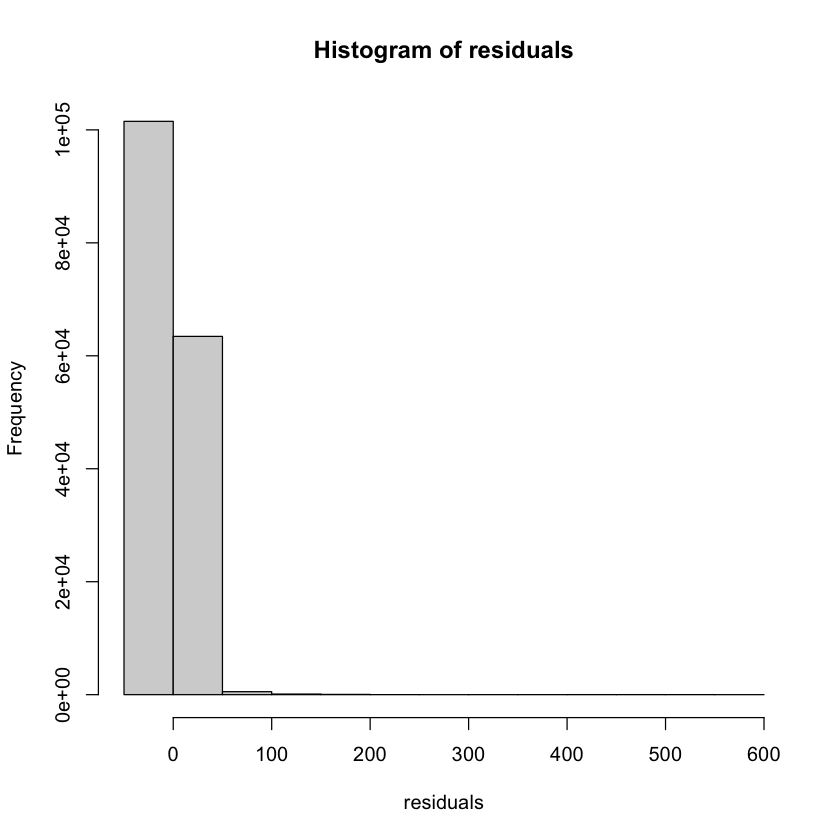

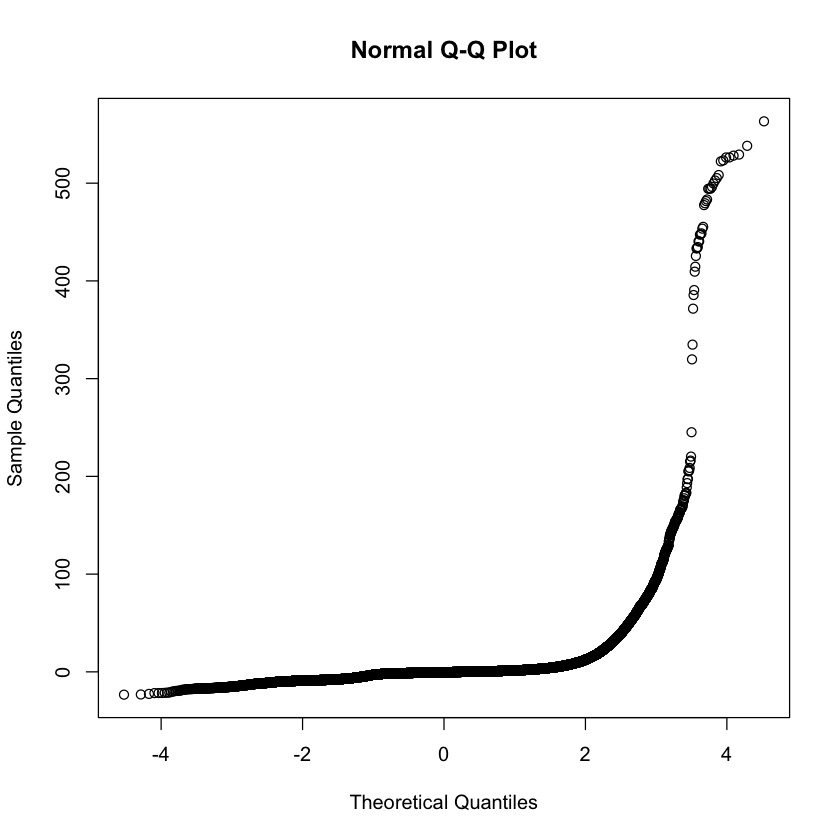

In [944]:
### Individual Analysis

aw.model0 <- lm(AW ~ STATE + YEAR + SUB + CORE + MONTH + avg_total
                   + avg_adult + summer, combined_df)

summary(aw.model0)

residuals <- residuals(aw.model0)
hist(residuals)
qqnorm(residuals)
# Data is right skewed
# use boxcox



In [945]:
combined_df$AW[combined_df$AW == 0] <- 1

[1] -0.9494949

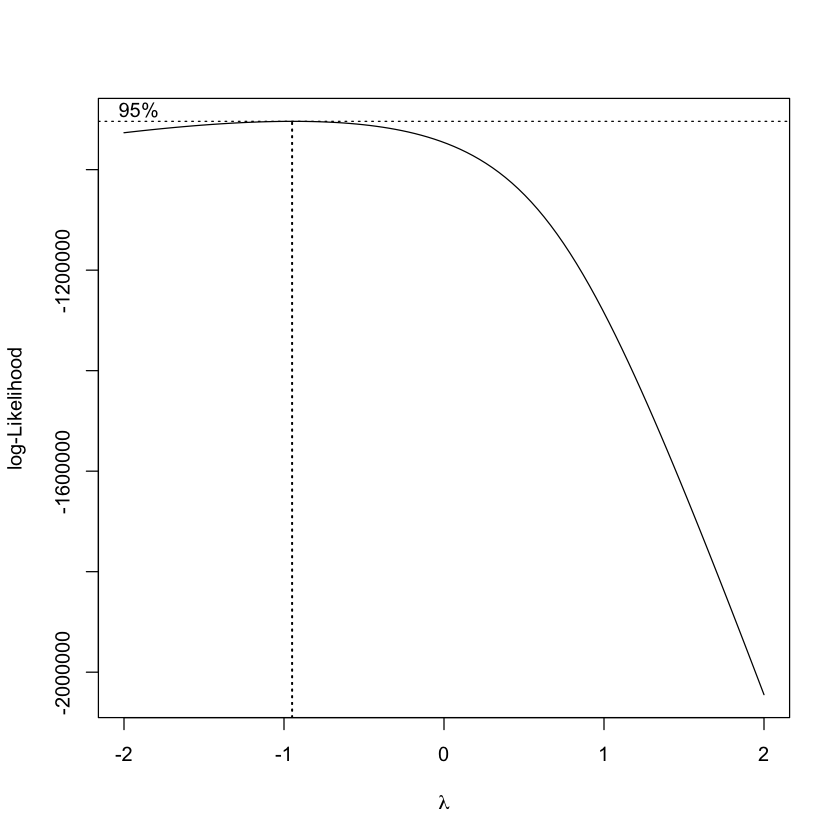

In [947]:
boxcox_result <- boxcox(aw.model0)

lambda_optimal <- boxcox_result$x[which.max(boxcox_result$y)]
lambda_optimal

In [948]:
combined_df$AW1 <- ifelse(lambda_optimal == 0, log(combined_df$AW)
                               , ((combined_df$AW^lambda_optimal) - 1) / combined_df$AW)

In [949]:
aw.model0 <- lm(AW1 ~ STATE + YEAR + SUB + CORE + MONTH + avg_total
                   + avg_adult + summer, combined_df)

summary(aw.model0)

# Does not really improve performance


Call:
lm(formula = AW1 ~ STATE + YEAR + SUB + CORE + MONTH + avg_total + 
    avg_adult + summer, data = combined_df)

Residuals:
       Min         1Q     Median         3Q        Max 
-4.803e-11 -1.000e-15  0.000e+00  0.000e+00  8.800e-14 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept) -3.420e-02  7.216e-13 -4.740e+10  < 2e-16 ***
STATE2       1.625e-16  3.060e-15  5.300e-02  0.95765    
STATE3      -2.605e-17  2.788e-15 -9.000e-03  0.99254    
STATE4       1.237e-16  2.113e-15  5.900e-02  0.95330    
STATE5       6.783e-17  2.963e-15  2.300e-02  0.98174    
STATE6       4.678e-16  3.656e-15  1.280e-01  0.89818    
STATE7       2.882e-16  5.105e-15  5.600e-02  0.95499    
STATE8      -1.077e-16  2.066e-14 -5.000e-03  0.99584    
STATE9      -1.010e-16  2.165e-14 -5.000e-03  0.99628    
STATE10     -9.489e-17  2.450e-15 -3.900e-02  0.96911    
STATE11      2.724e-17  3.650e-15  7.000e-03  0.99405    
STATE12      2.313e-15  1.928e-14  1.200e-01  

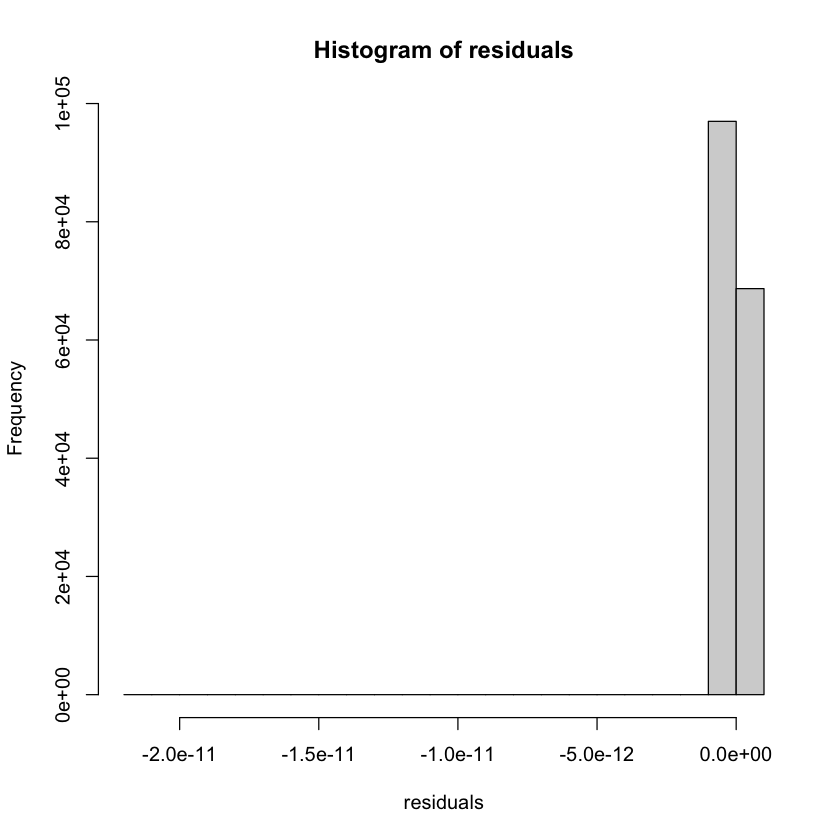

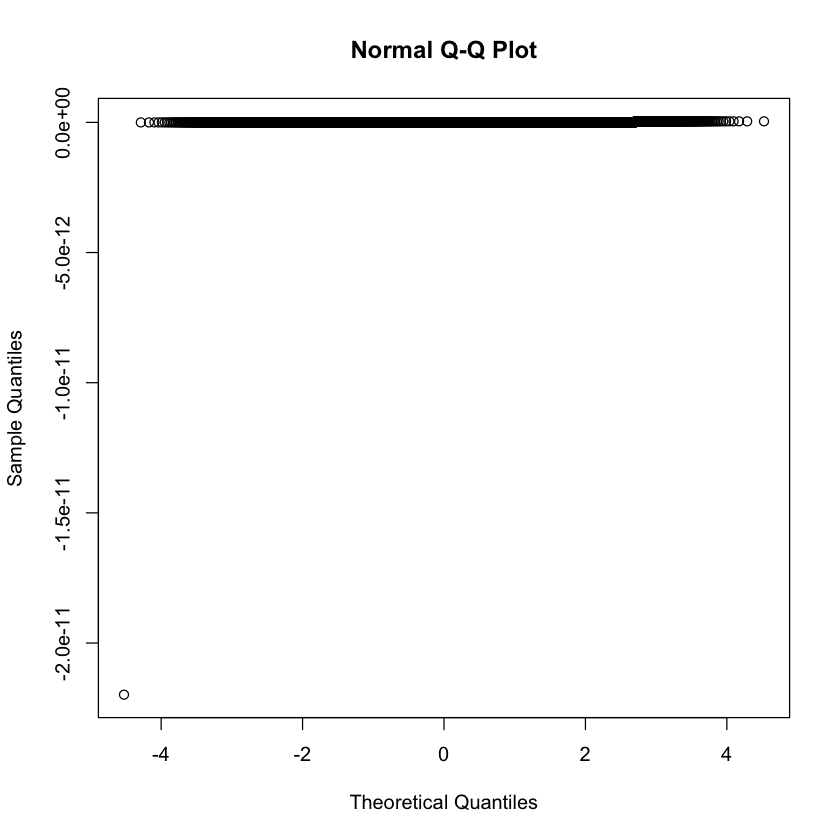

In [855]:
residuals <- residuals(aw.model0)
hist(residuals)
qqnorm(residuals)

In [950]:
combined_df[, c(6:26)][combined_df[, c(6:26)] == 0] <- 1
combined_df[,c(6:26)] <- log(combined_df[,c(6:26)])

In [952]:
aw.model0 <- lm(AW ~ STATE + YEAR + SUB + CORE + MONTH + avg_total
                   + avg_adult + summer, combined_df)
summary(aw.model0)


Call:
lm(formula = AW ~ STATE + YEAR + SUB + CORE + MONTH + avg_total + 
    avg_adult + summer, data = combined_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5434 -0.4223 -0.2318  0.3609  4.6795 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.7198236  4.4842899   1.499 0.133999    
STATE2       0.5439748  0.0190141  28.609  < 2e-16 ***
STATE3       0.2150969  0.0173370  12.407  < 2e-16 ***
STATE4       1.1835879  0.0131281  90.157  < 2e-16 ***
STATE5       0.5546914  0.0184227  30.109  < 2e-16 ***
STATE6       0.1737793  0.0227278   7.646 2.08e-14 ***
STATE7       0.3578150  0.0317285  11.277  < 2e-16 ***
STATE8      -0.1011849  0.1283432  -0.788 0.430468    
STATE9      -0.0726727  0.1345407  -0.540 0.589091    
STATE10      0.1056794  0.0152222   6.942 3.87e-12 ***
STATE11      0.3038586  0.0226919  13.391  < 2e-16 ***
STATE12      1.1419648  0.1197738   9.534  < 2e-16 ***
STATE13      0.3797701  0.0183286  20.720  < 2e-16 ***
STA

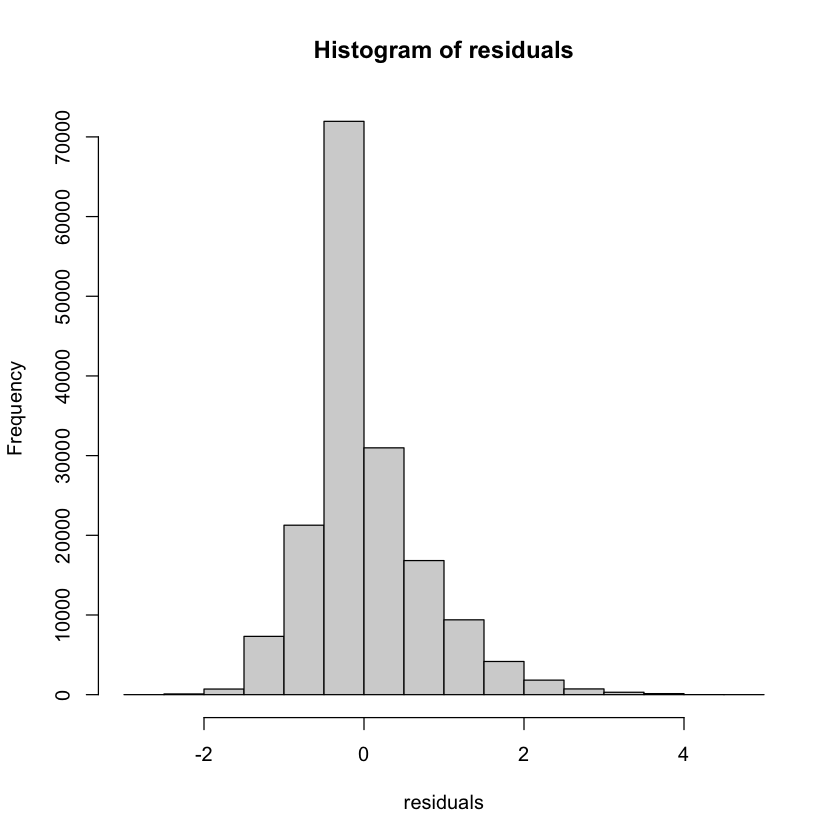

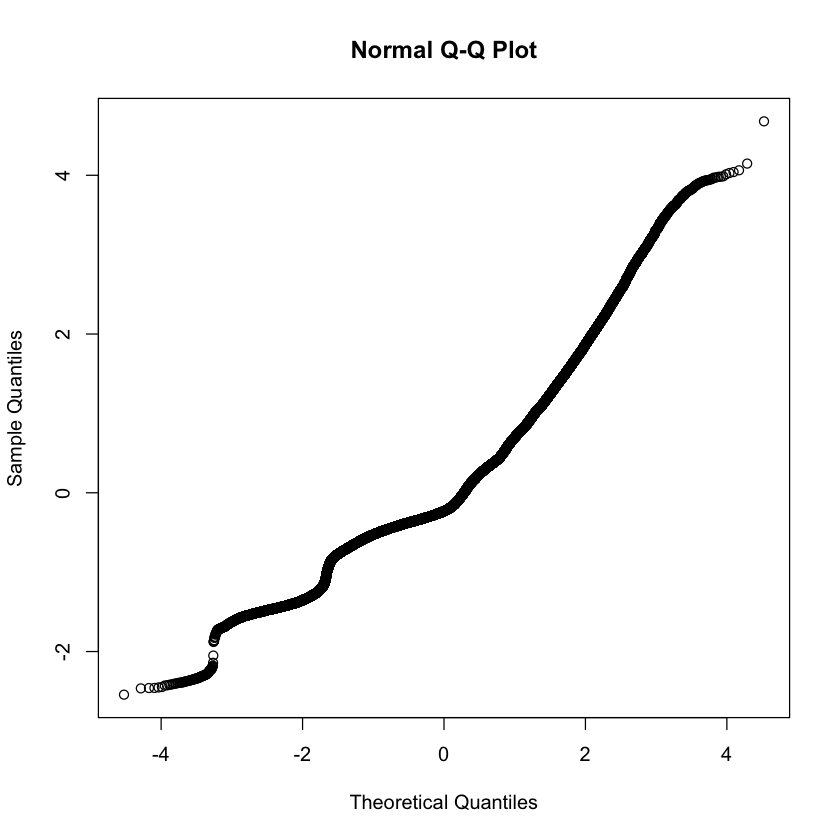

In [953]:
residuals <- residuals(aw.model0)
hist(residuals)
qqnorm(residuals)


integer(0)


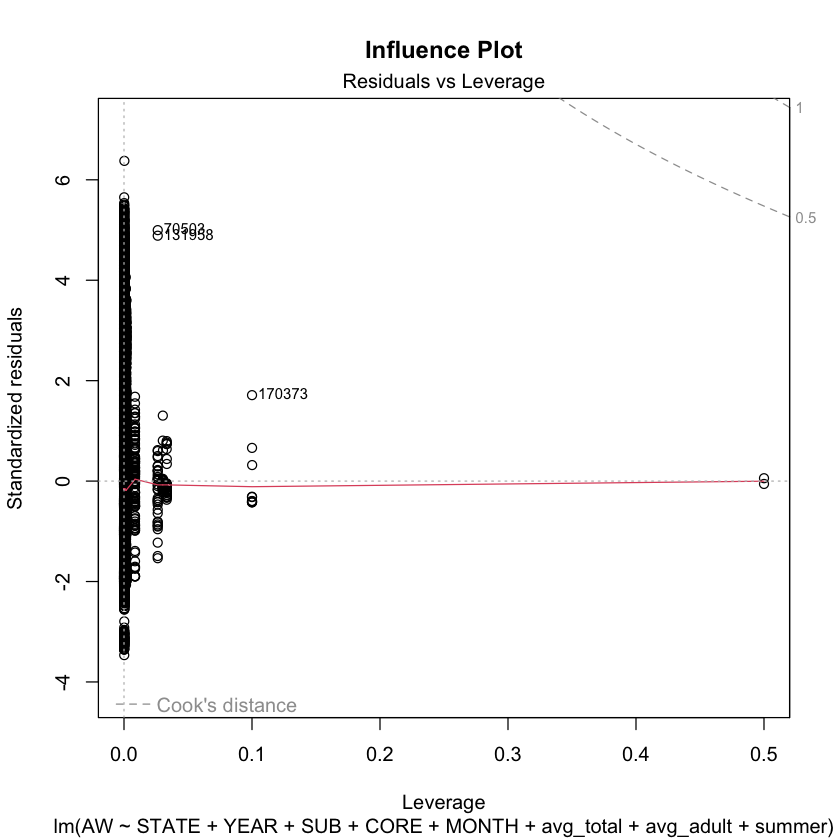

In [954]:
plot(aw.model0, which = 5, cook.levels = c(0.5, 1), main = "Influence Plot")

# Identify influential observations
influential_points <- which(influence.measures(aw.model0)$hat > 18 / nrow(combined_df))

# Display influential points
print(influential_points)

In [956]:
hat_values <- hatvalues(aw.model0)
cook_distances <- cooks.distance(aw.model0)

# Identify observations with high hat values or Cook's distance
leverage_points <- which(hat_values > 2 * mean(hat_values) | cook_distances > 4 / nrow(combined_df))
leverage_points

1      2      3      4      5      6      7      8      9     10     11 
     1      2      3      4      5      6      7      8      9     10     11 
    12     13     14     15     16     17     18     19     20     21     22 
    12     13     14     15     16     17     18     19     20     21     22 
    23     24     25     26     27     28     29     30     31     32     33 
    23     24     25     26     27     28     29     30     31     32     33 
    34     35     36     37     38     39     40     41     43     44     45 
    34     35     36     37     38     39     40     41     42     43     44 
    46     47     48     50     51     52     54     55     57     58     59 
    45     46     47     48     49     50     51     52     53     54     55 
    61     62     63     64     65     66     67     68     69     70     71 
    56     57     58     59     60     61     62     63     64     65     66 
    72     73     74     75     78     79     80     89     90     92     93 
    67     68     69     70     71     72     73     74     75     76     77 
    96    117    118    119    120    121    122    123    124    125    126 
    78     79     80     81     82     83     84     85     86     87     88 
   127    128    140    142    143    144    146    147    149    150    151 
    89     90     91     92     93     94     95     96     97     98     99 
   153    154    155    156    157    158    159    161    162    164    165 
   100    101    102    103    104    105    106    107    108    109    110 
   167    168    169    170    171    172    173    174    175    177    178 
   111    112    113    114    115    116    117    118    119    120    121 
   179    180    182    184    186    188    189    191    193    195    203 
   122    123    124    125    126    127    128    129    130    131    132 
   204    205    206    207    208    209    210    211    212    214    219 
   133    134    135    136    137    138    139    140    141    142    143 
   223    224    225    230    232    233    234    235    236    237    238 
   144    145    146    147    148    149    150    151    152    153    154 
   239    241    245    246    247    249    254    255    289    292    306 
   155    156    157    158    159    160    161    162    163    164    165 
   307    309    311    312    314    316    318    319    320    321    322 
   166    167    168    169    170    171    172    173    174    175    176 
   323    324    325    326    327    328    329    448    449    450    451 
   177    178    179    180    181    182    183    302    303    304    305 
   452    453    454    455    516    782    831    861    891   1012   1013 
   306    307    308    309    370    636    685    715    745    866    867 
  1015   1017   1228   1229   1230   1232   1235   1236   1325   1329   1330 
   869    871   1082   1083   1084   1086   1089   1090   1179   1183   1184 
  1332   1481   1487   1624   1627   1628   1630   1632   1633   1645   2029 
  1186   1335   1341   1478   1481   1482   1484   1486   1487   1499   1879 
  2038   2039   2083   2138   2142   2143   2144   2146   2147   2149   2192 
  1888   1889   1933   1987   1991   1992   1993   1995   1996   1998   2041 
  2195   2254   2256   2261   2265   2372   2374   2376   2380   2386   2419 
  2044   2103   2105   2110   2114   2221   2223   2225   2229   2235   2268 
  2517   2518   2570   2571   2572   2573   2574   2576   2577   2578   2591 
  2366   2367   2419   2420   2421   2422   2423   2425   2426   2427   2440 
  2592   2593   2594   2595   2596   2597   2598   2599   2600   2601   2602 
  2441   2442   2443   2444   2445   2446   2447   2448   2449   2450   2451 
  2607   2611   2612   2616   2618   2619   2620   2621   2622   2623   2624 
  2456   2460   2461   2465   2467   2468   2469   2470   2471   2472   2473 
  2625   2626   2627   2628   2629   2640   2664   2699   2701   2703   2704 
  2474   2475   2476   2477

In [955]:
outliers <- which(abs(rstandard(aw.model0)) > 2)
outliers


1      2      3      4      5      6      7      8      9     10     11 
     1      2      3      4      5      6      7      8      9     10     11 
    12    318    319    320    321    322    323    324    325    326    327 
    12    172    173    174    175    176    177    178    179    180    181 
   328    329    448    449    450    451    452    453    454    455    512 
   182    183    302    303    304    305    306    307    308    309    366 
   516    782    817    831    835    861    890    891   1012   1013   1015 
   370    636    671    685    689    715    744    745    866    867    869 
  1017   1042   1225   1228   1229   1230   1232   1235   1236   1325   1327 
   871    896   1079   1082   1083   1084   1086   1089   1090   1179   1181 
  1329   1330   1332   1467   1481   1487   1624   1627   1628   1630   1632 
  1183   1184   1186   1321   1335   1341   1478   1481   1482   1484   1486 
  1633   1634   1645   2029   2038   2039   2083   2136   2138   2141   2142 
  1487   1488   1499   1879   1888   1889   1933   1985   1987   1990   1991 
  2143   2144   2145   2146   2147   2149   2191   2192   2195   2254   2256 
  1992   1993   1994   1995   1996   1998   2040   2041   2044   2103   2105 
  2258   2261   2262   2265   2372   2376   2380   2386   2419   2517   2518 
  2107   2110   2111   2114   2221   2225   2229   2235   2268   2366   2367 
  2570   2571   2572   2573   2574   2576   2577   2578   2591   2593   2594 
  2419   2420   2421   2422   2423   2425   2426   2427   2440   2442   2443 
  2595   2596   2598   2600   2601   2602   2611   2612   2618   2619   2620 
  2444   2445   2447   2449   2450   2451   2460   2461   2467   2468   2469 
  2621   2622   2623   2624   2625   2626   2627   2628   2629   2640   2699 
  2470   2471   2472   2473   2474   2475   2476   2477   2478   2489   2548 
  2701   2703   2704   2705   2707   2824   2825   2828   2829   2830   2833 
  2550   2552   2553   2554   2556   2673   2674   2677   2678   2679   2682 
  2837   2838   2839   2840   2841   2842   2843   2844   2845   2846   2847 
  2686   2687   2688   2689   2690   2691   2692   2693   2694   2695   2696 
  2848   2880   2881   2882   2885   2891   2987   2989   2990   3157   3158 
  2697   2729   2730   2731   2734   2740   2835   2837   2838   2993   2994 
  3161   3162   3168   3235   3260   3275   3276   3277   3278   3279   3282 
  2997   2998   3004   3071   3096   3111   3112   3113   3114   3115   3118 
  3285   3286   3318   3327   3331   3353   3389   3397   3399   3403   3405 
  3121   3122   3154   3163   3167   3189   3225   3233   3235   3239   3241 
  3406   3407   3408   3410   3447   3453   3457   3475   3484   3495   3504 
  3242   3243   3244   3246   3283   3289   3293   3311   3320   3331   3340 
  3512   3513   3514   3515   3516   3517   3518   3519   3520   3521   3522 
  3348   3349   3350   3351   3352   3353   3354   3355   3356   3357   3358 
  3523   3555   3576   3637   3638   3646   3647   3648   3655   3663   3665 
  3359   3391   3412   3473   3474   3482   3483   3484   3491   3499   3501 
  3682   3687   3688   3689   3690   3691   3693   3714   3734   3743   3744 
  3518   3523   3524   3525   3526   3527   3529   3550   3570   3579   3580 
  3746   3747   3748   3749   3750   3751   3753   3754   3755   3785   3786 
  3582   3583   3584   3585   3586   3587   3589   3590   3591   3621   3622 
  3787   3788   3789   3790   3791   3792   3793   3794   3795   3796   3802 
  3623   3624   3625   3626   3627   3628   3629   3630   3631   3632   3638 
  3805   3822   3824   3828   3830   3834   3840   3841   3842   3843   3844 
  3641   3658   3660   3664   3666   3670   3676   3677   3678   3679   3680 
  3845   3846   3847   3867   3879   3900   3950   3971   3979   4005   4015 
  3681   3682   3683   3703   3715   3736   3786   3807   3815   3841   3851 
  4036   4045   4096   4100   4102   4104   4122   4125   4129   4130   4131 
  3872   3881   3932   3936

In [958]:
combined_df <- combined_df[-c(influential_points, outliers, leverage_points), ]

aw.model0 <- lm(AW ~ STATE + YEAR + SUB + CORE + MONTH + avg_total
                   + avg_adult + summer, combined_df)
summary(aw.model0)


Call:
lm(formula = AW ~ STATE + YEAR + SUB + CORE + MONTH + avg_total + 
    avg_adult + summer, data = combined_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3718 -0.3496 -0.1952  0.3795  1.6631 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.7216599  4.0700464   1.160  0.24601    
STATE2       0.3951911  0.0164027  24.093  < 2e-16 ***
STATE3       0.2137570  0.0151845  14.077  < 2e-16 ***
STATE4       1.1346412  0.0115069  98.605  < 2e-16 ***
STATE5       0.4611087  0.0160663  28.700  < 2e-16 ***
STATE6       0.1536877  0.0292796   5.249 1.53e-07 ***
STATE10      0.0972700  0.0133094   7.308 2.72e-13 ***
STATE11      0.1968300  0.0235838   8.346  < 2e-16 ***
STATE13      0.3913009  0.0157453  24.852  < 2e-16 ***
STATE14      0.2747779  0.0150966  18.201  < 2e-16 ***
STATE15      0.1313920  0.0182001   7.219 5.26e-13 ***
STATE16      0.0817601  0.0190952   4.282 1.86e-05 ***
STATE17      0.1499445  0.0148688  10.084  < 2e-16 ***
STA

In [ ]:
crPlots(aw.model0)

In [ ]:
aw.model0_null <- lm(, data = combined_df)

anova_result <- anova(aw.model0_simple, aw.model0_complex)
print(anova_result)

In [ ]:
plot(fitted(aw.model0), residuals)
abline(h = 0, col = "red")

# durbinWatsonTest(aw.model0)


print(combined_df[5, ])


combined_df[, c(6:26)][combined_df[, c(6:26)] == 0] <- 1


combined_df[,c(6:26)] <- log(combined_df[,c(6:26)])


head(combined_df)

summary(combined_df)

aw.model0 <- lm(AW ~ STATE + YEAR + SUB + CORE + MONTH + avg_total
                   + avg_adult + summer, combined_df)

summary(aw.model0)

residuals <- residuals(aw.model0)


hist(residuals)


qqnorm(residuals)

plot(aw.model0, which = 5, cook.levels = c(0.5, 1), main = "Influence Plot")

# Identify influential observations
influential_points <- which(influence.measures(aw.model0)$hat > 18 / nrow(combined_df))

# Display influential points
print(influential_points)

plot(aw.model0, which = 1, main = "Residuals vs. Fitted")

outliers <- which(abs(rstandard(aw.model0)) > 2)

combined_df <- combined_df[-c(influential_points, outliers), ]

aw.model0 <- lm(AW ~ STATE + YEAR + SUB + CORE + MONTH + avg_total
                   + avg_adult + summer, combined_df)

summary(aw.model0)



## EDA

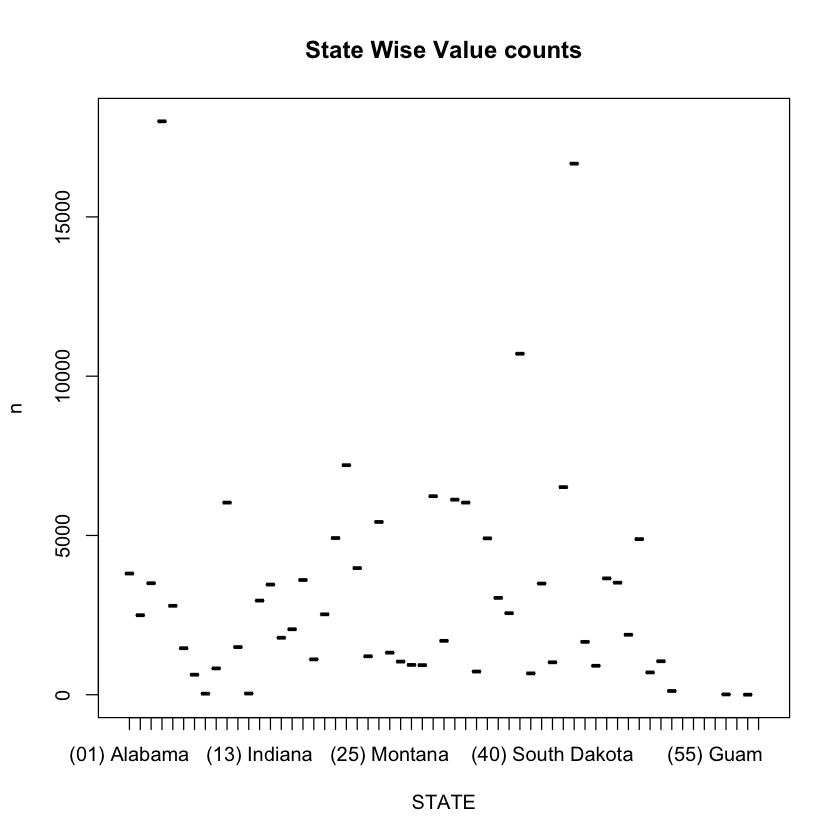

In [144]:
value_counts <- combined_df %>%
  count(STATE)

plot(value_counts, main = "State Wise Value counts")

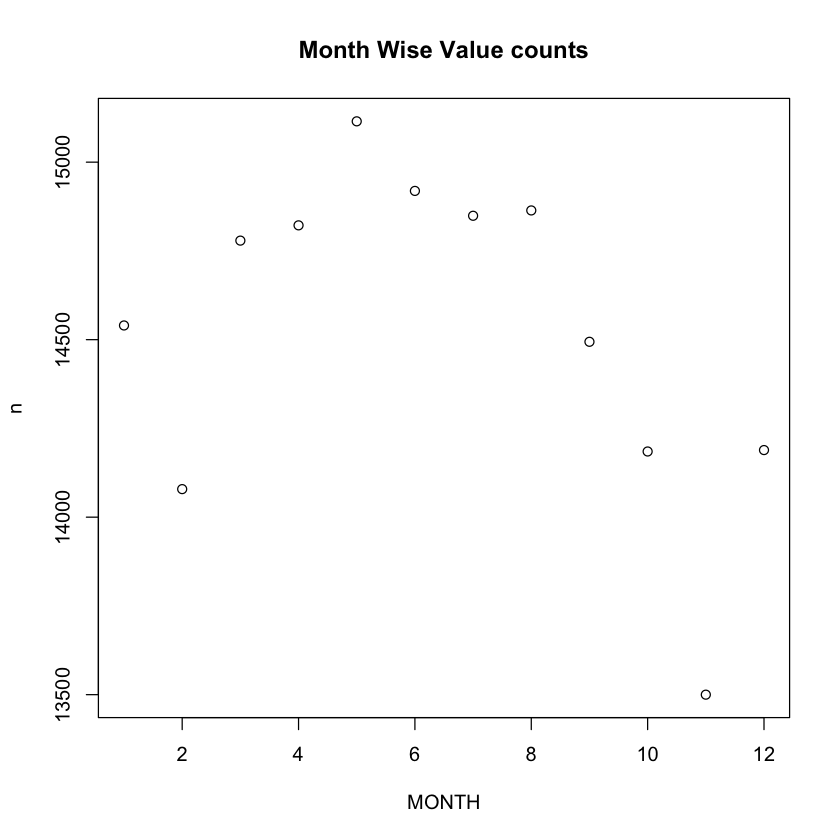

In [145]:
value_counts <- combined_df %>% count(MONTH)

plot(value_counts, main = "Month Wise Value counts")

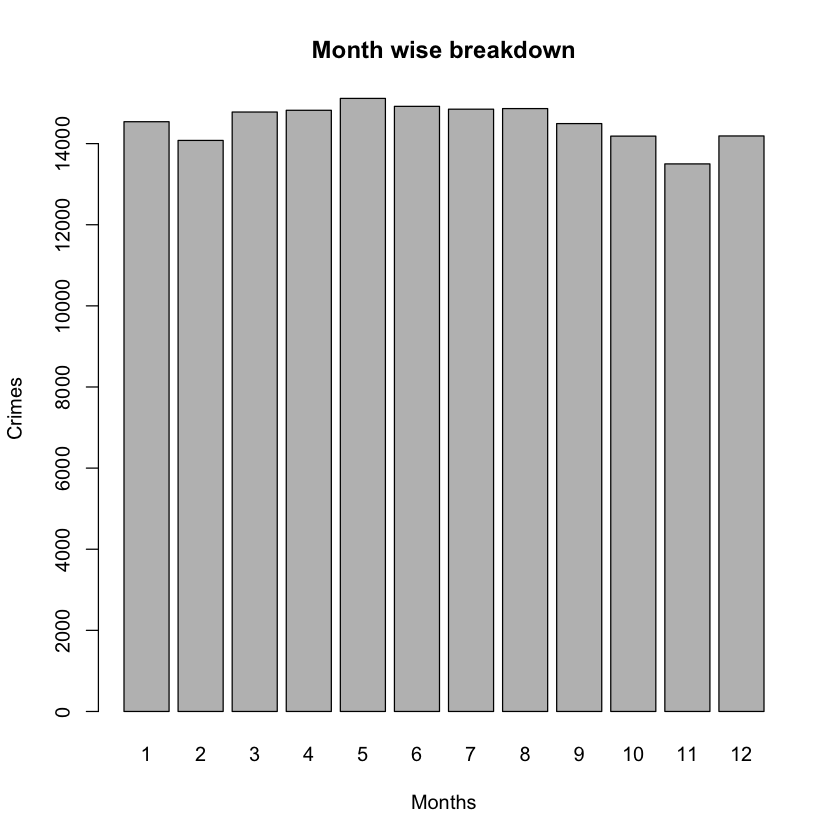

In [157]:
barplot(value_counts$n, names.arg = value_counts$MONTH, xlab = 'Months', ylab = 'Crimes', main = 'Month wise breakdown')

In [159]:
value_counts <- combined_df %>% count(YEAR, MONTH)


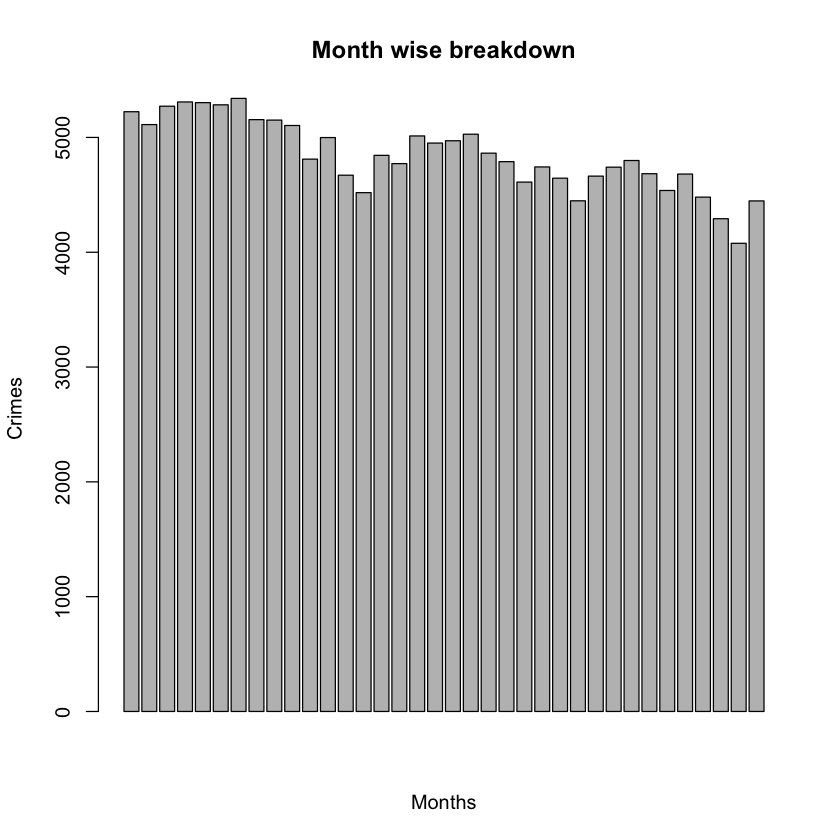

In [161]:
barplot(value_counts$n, xlab = 'Months', ylab = 'Crimes', main = 'Month wise breakdown')

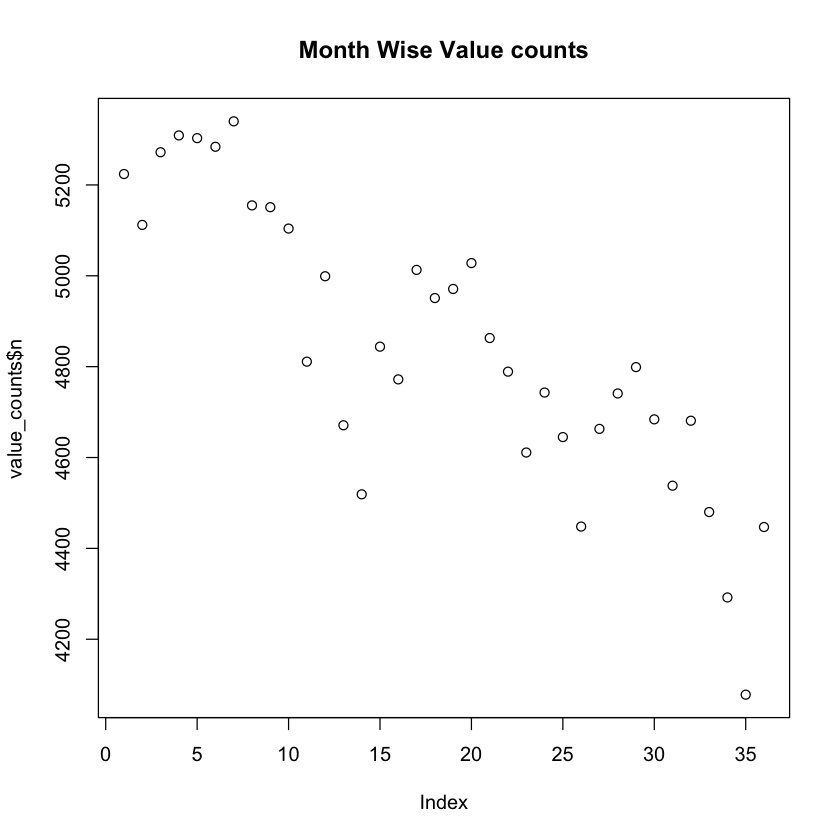

In [167]:
plot(value_counts$n, main = "Month Wise Value counts")

In [ ]:
# Hypothesis: Summer months have higher crimes than winter months

In [ ]:
da4 <- da1 |> 
  filter(!is.na(STATE) & !is.na(AA)) |> 
  group_by(STATE) |> 
  summarize(avg_adult_asian = mean(AA),
            count = n())
head(da4)